#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)


# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL4_Z3_2 = TDL_Class.TDL()
TDL4_Z3_2.initialize_TDL(9600,11200,2)

[ 9608  9609  9610  9611  9612  9613  9614  9615  9632  9633  9634  9635
  9636  9637  9638  9639  9656  9657  9658  9659  9660  9661  9662  9663
  9680  9681  9682  9683  9684  9685  9686  9687  9704  9705  9706  9707
  9708  9709  9710  9711  9728  9729  9730  9731  9732  9733  9734  9735
  9752  9753  9754  9755  9756  9757  9758  9759  9776  9777  9778  9779
  9780  9781  9782  9783  9800  9801  9802  9803  9804  9805  9806  9807
  9824  9825  9826  9827  9828  9829  9830  9831  9848  9849  9850  9851
  9852  9853  9854  9855  9872  9873  9874  9875  9876  9877  9878  9879
  9896  9897  9898  9899  9900  9901  9902  9903  9920  9921  9922  9923
  9924  9925  9926  9927  9944  9945  9946  9947  9948  9949  9950  9951
  9968  9969  9970  9971  9972  9973  9974  9975  9992  9993  9994  9995
  9996  9997  9998  9999 10016 10017 10018 10019 10020 10021 10022 10023
 10040 10041 10042 10043 10044 10045 10046 10047 10064 10065 10066 10067
 10068 10069 10070 10071 10088 10089 10090 10091 10

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR1.csv'.

There are 193 tapped bins and 200 untapped = 393 = 393

Tapped is: 49.11% 



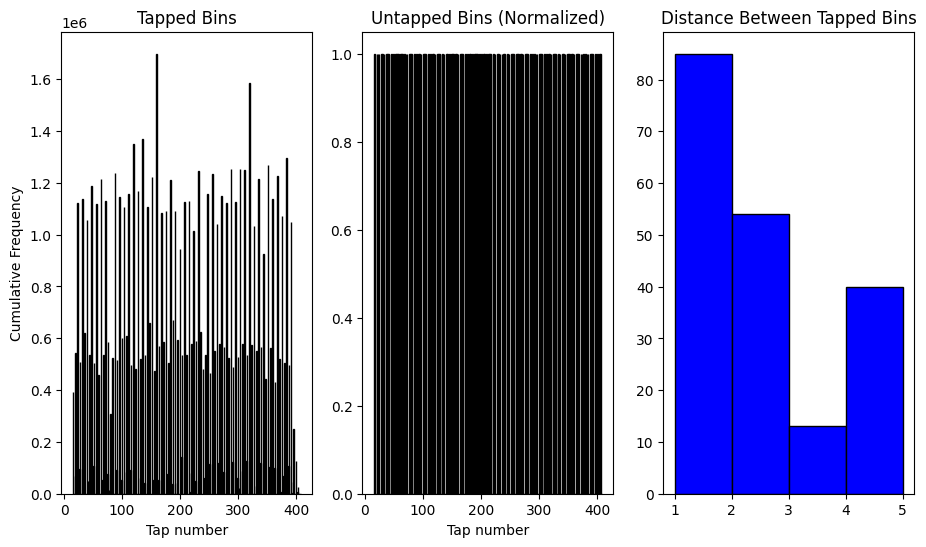

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL4_Z3_2.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL4_Z3_2.perform_POR()
to_print1 = TDL4_Z3_2.get_logical_assignments()
error_lib1 = TDL4_Z3_2.build_initial_error_lib()


Present taps: 
 [ 15  18  19  21  23  25  26  27  31  33  34  35  39  41  42  43  47  50
  51  55  58  59  63  65  66  67  69  71  73  74  75  77  79  81  82  83
  87  90  91  95  97  98  99 103 105 106 107 111 113 114 115 119 121 122
 123 127 130 131 135 137 138 139 143 146 147 151 153 154 155 159 161 162
 163 167 169 170 171 175 178 179 183 186 187 191 194 195 199 201 202 203
 207 210 211 215 217 218 219 223 225 226 227 231 233 234 235 237 239 241
 242 243 247 249 250 251 255 257 258 259 263 265 266 267 271 273 274 275
 277 279 281 282 283 287 289 290 291 293 295 297 298 299 301 303 306 307
 311 314 315 319 321 322 323 327 330 331 335 337 338 339 343 345 346 347
 351 353 354 355 359 361 362 363 367 369 370 371 373 375 377 378 379 381
 383 385 386 387 391 393 394 395 399 401 402 403 407] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'get_logical_assignments' in

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL4_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL4_Z3_2.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]

Logical bin assignment: 

{0: np.int64(9608), 1: np.int64(9609), 2: np.int64(9610), 3: np.int64(9611), 4: np.int64(9612), 5: np.int64(9613), 6: np.int64(9614), 7: np.int64(9615), 8: np.int64(9632), 9: np.int64(9633), 10: np.int64(9634), 11: np.int64(9635), 12: np.int64(9636), 13: np.int64(9637), 14: np.int64(9638), 15: np.int64(9639), 16: np.int64(9656), 17: np.int64(9657), 18: np.int64(9658), 19: np.int64(9659), 20: np.int64(9660), 21: np.int64(9661), 22: np.int64(9662), 23: np.int64(9663), 24: np.int64(9680), 25: np.int64(9681), 26: np.int64(9682), 27: np.int64(9683), 28: np.int64(9684), 29

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR2.csv'.

There are 360 tapped bins and 31 untapped = 391 = 391

Tapped is: 92.07% 



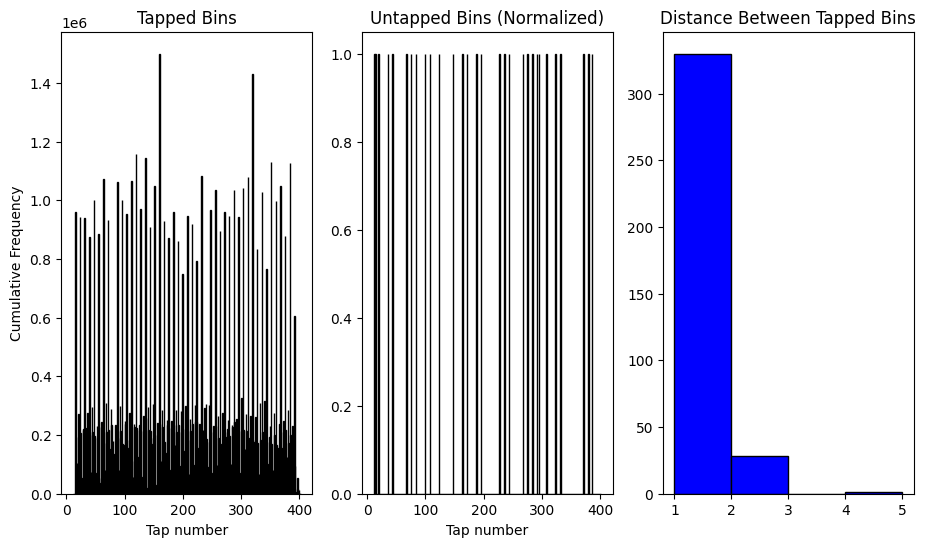

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL4_Z3_2.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL4_Z3_2.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL4_Z3_2.get_logical_assignments()

Present taps: 
 [ 11  15  16  17  18  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  36  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  68  69  70  71
  72  73  74  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98 100 101 102 103 104 105 106 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 164 165 166 167 168
 169 170 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188
 189 190 191 192 193 194 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 228 229 230 231 232 233 234 236 237 238 239 240 241 242 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 268 269 270 271 272 273 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL4_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL4_Z3_2.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR3.csv'.

There are 387 tapped bins and 2 untapped = 389 = 389

Tapped is: 99.49% 



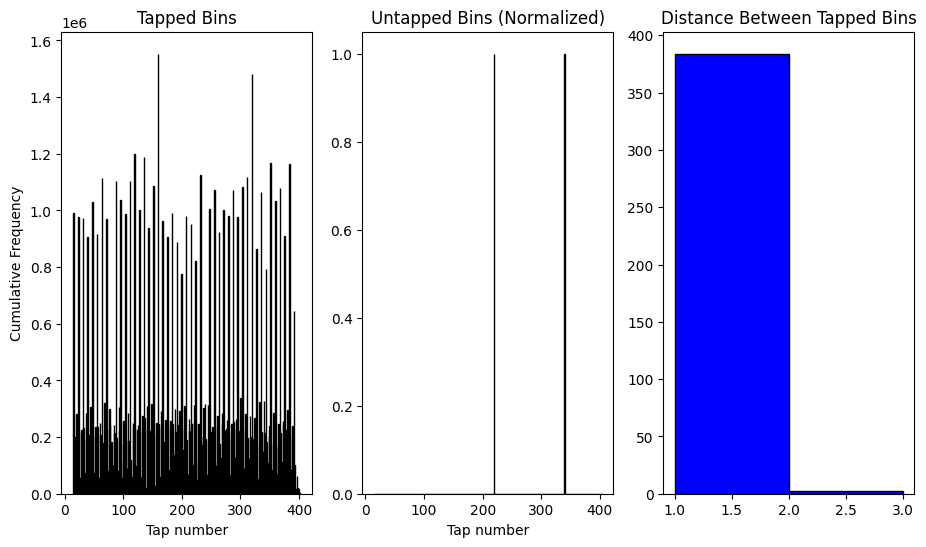

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250425/Unsync1_Ch4_Z3_2_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL2_Z3_2.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL2_Z3_2.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 25

KeyError: ((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8)))

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [11]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL4_Z3_2.npz", cdc_to_pass = cdc_to_pass)

In [12]:
print(cdc_to_pass)

{np.int64(9636): np.float64(0.000624576960640766), np.int64(9657): np.float64(44.247307136434195), np.int64(9658): np.float64(8.993774395306893), np.int64(9656): np.float64(0.7145160429730363), np.int64(9659): np.float64(3.336847024863338), np.int64(9663): np.float64(1.4697634263078596), np.int64(9661): np.float64(12.570057459295873), np.int64(9660): np.float64(11.589694694290099), np.int64(9662): np.float64(0.000624576960640766), np.int64(9681): np.float64(43.55277755620167), np.int64(9680): np.float64(9.567983685335985), np.int64(9682): np.float64(0.3904498256805703), np.int64(9687): np.float64(2.038440748971277), np.int64(9683): np.float64(2.432058072095097), np.int64(9685): np.float64(10.055644453676287), np.int64(9686): np.float64(10.092048367953634), np.int64(9684): np.float64(3.861848572921948), np.int64(9705): np.float64(43.43508941176093), np.int64(9704): np.float64(10.277547725263942), np.int64(9706): np.float64(1.637953079280409), np.int64(9707): np.float64(3.190829853993536

In [13]:
print(to_print2)

{0: np.int64(9608), 1: np.int64(9609), 2: np.int64(9610), 3: np.int64(9611), 4: np.int64(9612), 5: np.int64(9613), 6: np.int64(9614), 7: np.int64(9615), 8: np.int64(9632), 9: np.int64(9633), 10: np.int64(9634), 11: np.int64(9635), 12: np.int64(9639), 13: np.int64(9637), 14: np.int64(9638), 15: np.int64(9636), 16: np.int64(9657), 17: np.int64(9658), 18: np.int64(9656), 19: np.int64(9659), 20: np.int64(9663), 21: np.int64(9661), 22: np.int64(9660), 23: np.int64(9662), 24: np.int64(9681), 25: np.int64(9680), 26: np.int64(9682), 27: np.int64(9687), 28: np.int64(9683), 29: np.int64(9685), 30: np.int64(9686), 31: np.int64(9684), 32: np.int64(9705), 33: np.int64(9704), 34: np.int64(9706), 35: np.int64(9707), 36: np.int64(9711), 37: np.int64(9709), 38: np.int64(9710), 39: np.int64(9708), 40: np.int64(9729), 41: np.int64(9728), 42: np.int64(9730), 43: np.int64(9731), 44: np.int64(9735), 45: np.int64(9733), 46: np.int64(9734), 47: np.int64(9732), 48: np.int64(9753), 49: np.int64(9754), 50: np.in

In [14]:
print(bin3)
print(present_taps3)
print(freq3)

[ 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 2)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_25_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_25_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_25_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print3

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL4_Z3_2.logical_assignment, TDL_start = TDL4_Z3_2.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 152
5:[np.int64(8)]
8:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
11:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
14:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
17:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
20:[np.int64(3), np.int64(4), np.int64(8)]
23:[np.int64(3), np.int64(4), np.int64(8)]
26:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
29:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
32:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
35:[np.int64(3), np.int64(4), np.int64(8)]
38:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
41:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
44:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
47:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
50:[np.int64(3), np.int64(4), np.int64(8)]
53:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
56:[np.int64(3), np.int64(4), np.int64(8)]
59:[np.int64(2), np.int64(3),

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL4_Z3_2.logical_assignment, TDL_start = TDL4_Z3_2.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 5. Ending Cell num 152
5:[np.int64(4), np.int64(8)]
8:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
35:[np.int64(1), np.int64(2), np.int

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL3_Z3_2.logical_assignment, TDL_start = TDL3_Z3_2.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 152
5:[np.int64(6), np.int64(7), np.int64(8)]
8:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(

In [ ]:
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

(np.int64(2), np.int64(3), np.int64(4), np.int64(8)):[2, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

0.0058588900736735346
1.846920597498587
0.0
10.07781066696695
10.042326582730427
1.2302251681309502
47.840388903673265
8.220826008293423
0.5044315356978923
4.9226961388367005
0.9643071573677674
11.406077745604938
10.806297498869359
1.1933708596030037
43.47598828992145
6.159630681084277
3.0314086237640856
3.326999077803615
1.53011529149874
13.866906074774816
9.414244117009925
0.0684639654576851
43.758018248387245
9.621100735901399
0.7119968912918266
3.66431049906132
1.611431015827709
11.602775805094478
10.585266145928674
2.036484040850024
42.85801713448939
9.234130496357961
1.4990726239309695
2.2284099398763297
0.10026261884141323
13.894452307943782
10.89096791025664
0.9916643940827432
43.0337838366996
9.964649040140756
0.7713890269580171
4.2753832839227695
1.638599256088695
13.625557603030265
9.414669359031402
3.2853726088124344
43.64126568893525
10.715059460705943
1.9451515044596135
3.991888602938566
1.801608697654612
10.53848952356628
10.436147943730983
0.8676354711521541
48.54784988

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>